In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

In [2]:
page = 1
scraped_data = []
while page!=18:
      url= f'https://countrymusichalloffame.org/hall-of-fame/members/page/{page}'
      response = requests.get(url)
      data = BS(response.text, 'html.parser')
      cards_data = data.find_all('div', attrs={'class', 'vertical-card_content'})  
      for card in cards_data:
          card_details = {}  
          names = card.find('h3')
          year_inducted = str(card.find('p'))
          year_new = re.findall(r'\d',year_inducted)
          year = ''.join(year_new)        
          card_details['name'] = names.text
          card_details['year_inducted'] = year
          scraped_data.append(card_details)          
      page = page + 1      
      df_hall_of_fame = pd.DataFrame.from_dict(scraped_data)

In [3]:
df_hall_of_fame

,name,year_inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
142,Hank Williams Jr.,2021
143,Bob Wills,1968
144,Mac Wiseman,2014
145,Tammy Wynette,1998


In [4]:
list_count_year = df_hall_of_fame.groupby(['year_inducted']).count()

In [5]:
df_year_count = pd.DataFrame(list_count_year).reset_index()
df_year_count.columns = ["year","count"]
df_year_count

,year,count
0,1961,3
1,1962,1
2,1964,1
3,1965,1
4,1966,4
5,1967,4
6,1968,1
7,1969,1
8,1970,2
9,1971,1


In [6]:
df_year_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    60 non-null     object
 1   count   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
df_year_count['year'] = pd.DatetimeIndex(df_year_count['year']).year

In [8]:
df_year_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    60 non-null     int64
 1   count   60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [9]:
decades_list = df_year_count.groupby((df_year_count['year']//10)*10)['count'].sum()
decades_list

year
1960    16
1970    15
1980    20
1990    21
2000    36
2010    32
2020     7
Name: count, dtype: int64

In [10]:
df_decades = pd.DataFrame(decades_list).reset_index()
df_decades.columns = ["decade","sum"]
df_decades

,decade,sum
0,1960,16
1,1970,15
2,1980,20
3,1990,21
4,2000,36
5,2010,32
6,2020,7


C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


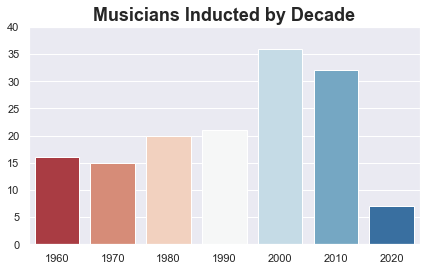

In [32]:
data = df_decades
#set chart size
sns.set(rc={"figure.figsize":(7,4)}) #width=7, height=4
g = sns.barplot('decade','sum',data=data, palette = "RdBu")
#g.set(xlabel=None,ylabel=None,title="January")
g.set_xlabel(None)
g.set_ylabel(None)
plt.yticks(np.arange(0,45,5))
g.set_title("Musicians Inducted by Decade",fontdict= { 'fontsize': 18, 'fontweight':'bold'});


In [ ]:
names = df_hall_of_fame['name'].tolist()

In [ ]:
names

In [ ]:
names_new =[]
for x in names:
    name = str(x)
    names_split = name.split()
    names_joint = '-'.join(names_split) 
    names_new.append(names_joint)

In [ ]:
names_new

In [ ]:
print(df_hall_of_fame.loc[[139]])